## Make plot ERF 2019

In [1]:
import pandas as pd
import numpy.testing
from numpy.testing import assert_allclose
from ar6_ch6_rcmipfigs.utils.plot import get_chem_col
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR, INPUT_DATA_DIR
from pathlib import  Path
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in
hallo


## Get tables from script from Bill

In [2]:
from ar6_ch6_rcmipfigs.notebooks.ERF_hist_attribution import attribution_1750_2019_v2_smb

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/notebooks/ERF_hist_attribution/attribution_1750_2019_v2_smb.py:92: RuntimeWarning: invalid value encountered in true_divide
  ch4_sd = (ch4-ch4_2014)*lifech4_sd/lifech4


[2.05755418 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.30980392156862746, 0.3215686274509804, 0.7176470588235294)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)


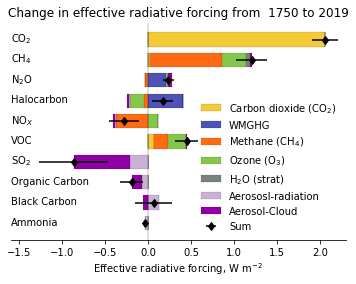

In [3]:
table, table_sd = attribution_1750_2019_v2_smb.main(plot=True)

In [4]:
table.sum()#_sd

CO2             2.144647
GHG             0.620000
CH4_lifetime    0.540000
O3              0.480930
O3_prime       -0.010930
Strat_H2O       0.050000
Aerosol        -0.220000
Cloud          -0.803708
Total           2.800939
dtype: float64

In [5]:
import matplotlib.pyplot as plt
import numpy as np

## Scale cloud forcing to fit mest estimate 0.84

In [6]:
table.sum()['Cloud']

-0.803708333

In [7]:
(correct_cloud_forcing*table['Cloud'].sum())#.sum()

NameError: name 'correct_cloud_forcing' is not defined

In [ ]:
table_c = table.copy()
correct_cloud_forcing = -0.84
scale_fac = correct_cloud_forcing/table.sum()['Cloud']
table_c['Cloud']=scale_fac*table['Cloud']
table_c.sum()


## Add together O3 primary and O3

In [ ]:
o3_sum = table_c['O3']+table_c['O3_prime']
tab2 = table_c.copy(deep=True).drop(['O3','O3_prime','Total'], axis=1)
tab2['O3'] = o3_sum

## Replace GHG with N2O and HC

In [ ]:
table_ed = tab2.copy(deep=True)
_ghg = tab2.loc['HC','GHG']
table_ed.loc['HC','GHG'] = 0
table_ed['HC'] = 0
table_ed.loc['HC','HC']=_ghg
table_ed
_ghg = tab2.loc['N2O','GHG']
table_ed.loc['N2O','GHG'] = 0
table_ed['N2O']=0
table_ed.loc['N2O','N2O']=_ghg
table_ed = table_ed.drop('GHG', axis=1)
table_ed

 No need to fix std because we only use the total (which is not influenced by the summation above). 

In [ ]:
table_sd

Write tables to file.

In [ ]:
table_ed.to_csv(RESULTS_DIR/'tables_historic_attribution/table_mean_smb_orignames.csv')
table_sd.to_csv(RESULTS_DIR/'tables_historic_attribution/table_std_smb_orignames.csv')

In [ ]:
from ar6_ch6_rcmipfigs.utils.plot import get_chem_col

Variables in the rigth order:

In [ ]:
varn = ['co2','N2O','HC','ch4','o3','H2O_strat','ari','aci']
var_dir = ['CO2','N2O','HC','CH4_lifetime','O3','Strat_H2O','Aerosol','Cloud']

Colors:

In [ ]:
cols = [get_chem_col(var) for var in varn]

## Uncertainty:

We have the standard deviation, but would like the use the standard error of the mean AND we would like to calculate the 5-95th percentile. 

We have the standard deviation (as far as I can tell, not the unbiased one)

$\sigma=\sqrt {\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{n}}$

The unbiased estimator would be:

$s=\sqrt {\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{n-1}} = \sigma \cdot \sqrt{ \frac{n}{n-1}}$

The standard error is:

$SE = \frac{\sigma}{n}$

Finally, we want 5-95th percentile. Assuming normal distribution, this amounts to multiplying the standard error by 1.645

In [ ]:
std_2_95th = 1.645

In [ ]:
import pandas as pd
num_mod_lab = 'Number of models (Thornhill 2020)'
thornhill = pd.read_csv(INPUT_DATA_DIR/'table2_thornhill2020.csv', index_col=0)
thornhill.index = thornhill.index.rename('Species')
thornhill

![](thornhill.jpg)

In [ ]:
sd_tot = table_sd['Total_sd']
df_err= pd.DataFrame(sd_tot.rename('std'))
df_err['SE'] = df_err

df_err['SE'] = df_err['std']/np.sqrt(thornhill[num_mod_lab])
df_err['95-50_SE'] = df_err['SE']*std_2_95th
df_err.loc['CO2','95-50_SE']= df_err.loc['CO2','std']
df_err

df_err['95-50'] = df_err['std']*std_2_95th
df_err.loc['CO2','95-50']= df_err.loc['CO2','std']
df_err

## Rename some variables

In [ ]:
rename_dic_cat = {
    'CO2':'Carbon dioxide (CO$_2$)',
    'GHG':'WMGHG',
    'CH4_lifetime': 'Methane (CH$_4$)',
    'O3': 'Ozone (O$_3$)',
    'Strat_H2O':'H$_2$O (strat)',
    'Aerosol':'Aerosol-radiation',
    'Cloud':'Aerosol-cloud',
    'N2O':'N$_2$O',
    'HC':'CFC + HCFC',

}
rename_dic_cols ={
    'CO2':'CO$_2$',
    'CH4':'CH$_4$',
    'N2O':'N$_2$O',
    'HC':'CFC + HCFC',
    'NOx':'NO$_x$',
    'VOC':'NMVOC + CO',
    'SO2':'SO$_2$',
    'OC':'Organic carbon',
    'BC':'Black carbon',
    'NH3':'Ammonia'
}
tab_plt = table_ed.loc[::-1,var_dir].rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)
tab_plt

In [ ]:
fn_sd = RESULTS_DIR/'tables_historic_attribution/table_uncertainties_smb_plt.csv'
fn_mean = RESULTS_DIR/'tables_historic_attribution/table_mean_smb_plt.csv'

In [ ]:
df_err = df_err.rename(rename_dic_cols, axis=0)
df_err.to_csv(fn_sd)
tab_plt.to_csv(fn_mean)

In [ ]:
width = 0.7
kwargs = {'linewidth':.1,'edgecolor':'k'}

In [ ]:
import seaborn as sns

In [ ]:
ybar = np.arange(len(tab_plt)+1)#, -1)
ybar

In [ ]:
table_ed.sum(axis=0)

In [ ]:
fig, ax = plt.subplots(dpi=150)#figsize=[10,10])


tab_plt.plot.barh(stacked=True, color=cols, linewidth=.0, edgecolor='k',ax=ax, width=width)
tot = table_ed.sum(axis=1)[::-1]#table_ed['Total'][::-1]
xerr = df_err['95-50'][::-1]
y = np.arange(len(tot))
plt.errorbar(tot, y,xerr=xerr,marker='d', linestyle='None', color='k', label='Sum', )
plt.legend(frameon=False)
ax.set_ylabel('')
sns.despine()





for lab, y in zip(tab_plt.index, ybar):
        #plt.text(-1.55, ybar[i], species[i],  ha='left')#, va='left')
    plt.text(-1.9, y-0.1, lab,  ha='left')#, va='left')
plt.title('Change in effective radiative forcing from  1750 to 2019')
plt.xlabel(r'Effective radiative forcing, W m$^{-2}$')
plt.xlim(-1.5, 2.6)
    #plt.xlim(-1.6, 2.0)
sns.despine(fig, left=True, trim=True)
plt.legend(loc='lower right', frameon=False)
plt.axvline(x=0., color='k', linewidth=0.25)
fn = 'attribution_1750_2019_5-95th.png'
fp = RESULTS_DIR /'figures_historic_attribution'/fn
fp.parent.mkdir(parents=True, exist_ok=True)
ax.set_yticks([])

plt.savefig(fp, dpi=300)
plt.savefig(fp.with_suffix('.pdf'), dpi=300)
plt.show()